# K_means Clustering EastWestAirlines 

In [23]:
# Firstly We Have to IMPORT the Libraries -
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Importing the Data from our system - 
data = pd.read_excel('D:/Top Mentor/Classes Details/5th May/EastWestAirlines.xlsx',sheet_name ='data')
data.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [25]:
## Firstly We have to copy this data as our data keep safe - 
df = data.copy()
print(df.head(2))

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  


In [26]:
##Checking Data Parameter :-
print('no of columns -\n ' , df.columns)
print('no of shapes - ' , df.shape)
print('no of lenght - ' , len(df))
print('no of datatype - \n' , df.dtypes)

no of columns -
  Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')
no of shapes -  (3999, 12)
no of lenght -  3999
no of datatype - 
 ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object


In [27]:
# Checking Null Values -
print('Null Values -',df.isnull().sum())

Null Values - ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [28]:
#  Checking Data Information 
print('DataSet Information -\n',df.describe())

DataSet Information -
                ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.0000

In [30]:
df = df.drop(columns=['ID#'])

In [41]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [31]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [32]:
# Define the autoencoder structure
input_dim = df_scaled.shape[1]
encoding_dim = 5  # Dimension of the latent space

# Input layer
input_layer = Input(shape=(input_dim,))
# Encoder layers
encoder = Dense(10, activation="relu")(input_layer)
encoder = Dense(encoding_dim, activation="relu")(encoder)
# Decoder layers
decoder = Dense(10, activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356 (1.39 KB)

 Trainable params: 356 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train the model
history = autoencoder.fit(df_scaled, df_scaled, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.1831 - val_loss: 1.1308
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0663 - val_loss: 0.9539
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8472 - val_loss: 0.9415
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8616 - val_loss: 0.9203
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9303 - val_loss: 0.9012
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7930 - val_loss: 0.8903
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7430 - val_loss: 0.8791
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7565 - val_loss: 0.8698
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7433 - val_loss: 0.8591
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6670 - val_loss: 0.8497
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6968 - val_loss: 0.8400
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [34]:
# Encoder model to extract the latent space
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Get the latent space representation
latent_space = encoder_model.predict(df_scaled)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_k

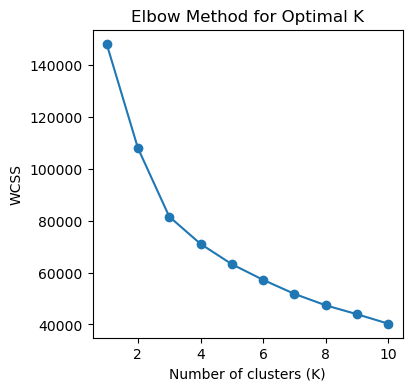

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
# Determine the optimal number of clusters using the elbow method
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(latent_space)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(4, 4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Let's assume the optimal K is 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(latent_space)


In [38]:
# Calculate summary statistics for each cluster
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        2181.813501   50988.578105  148.912592   1.117265   1.012116   
1        1793.537086  100498.596026   83.658940   3.442384   1.000000   
2        1723.882022  139012.500000  594.674157   2.561798   1.168539   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         1.011683   4280.938987     5.791000         265.897447   
1         1.014570  34238.109272    18.152318         281.625828   
2         1.000000  39154.185393    31.477528        4494.488764   

         Flight_trans_12  Days_since_enroll    Award?  
Cluster                                                
0               0.760710        3808.560363  0.229338  
1               0.861589        4526.302649  0.531788  
2              13.674157        4684.376404  0.831461  


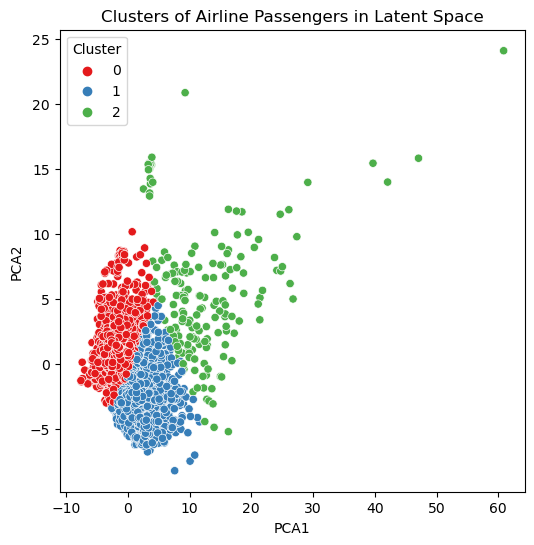

In [40]:
from sklearn.decomposition import PCA

# Reduce data to two dimensions
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_space)

# Add PCA columns for visualization
data['PCA1'] = latent_pca[:, 0]
data['PCA2'] = latent_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set1')
plt.title('Clusters of Airline Passengers in Latent Space')
plt.show()
